In [1]:
!pip install gradio


In [2]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import gradio as gr
import fastbook
fastbook.setup_book()

In [3]:
#export
from fastbook import *
from fastai.vision.widgets import *

In [4]:
def is_cat(x):
  return x[0].isupper()

In [5]:
!pip install nbdev

Computers are very good at classifying both short and long documents based on categories such as spam or not spam, sentiment (e.g., is the review positive or negative), author, source website, and so forth. We are not aware of any rigorous work done in this area to compare them to humans, but anecdotally it seems to us that deep learning performance is similar to human performance on these tasks. Deep learning is also very good at generating context-appropriate text, such as replies to social media posts, and imitating a particular author's style. It's good at making this content compelling to humans too—in fact, even more compelling than human-generated text. However, deep learning is currently not good at generating *correct* responses! We don't currently have a reliable way to, for instance, combine a knowledge base of medical information with a deep learning model for generating medically correct natural language responses. This is very dangerous, because it is so easy to create content that appears to a layman to be compelling, but actually is entirely incorrect.

Another concern is that context-appropriate, highly compelling responses on social media could be used at massive scale—thousands of times greater than any troll farm previously seen—to spread disinformation, create unrest, and encourage conflict. As a rule of thumb, text generation models will always be technologically a bit ahead of models recognizing automatically generated text. For instance, it is possible to use a model that can recognize artificially generated content to actually improve the generator that creates that content, until the classification model is no longer able to complete its task.

Despite these issues, deep learning has many applications in NLP: it can be used to translate text from one language to another, summarize long documents into something that can be digested more quickly, find all mentions of a concept of interest, and more. Unfortunately, the translation or summary could well include completely incorrect information! However, the performance is already good enough that many people are using these systems—for instance, Google's online translation system (and every other online service we are aware of) is based on deep learning.

#### Combining text and images

The ability of deep learning to combine text and images into a single model is, generally, far better than most people intuitively expect. For example, a deep learning model can be trained on input images with output captions written in English, and can learn to generate surprisingly appropriate captions automatically for new images! But again, we have the same warning that we discussed in the previous section: there is no guarantee that these captions will actually be correct.

Because of this serious issue, we generally recommend that deep learning be used not as an entirely automated process, but as part of a process in which the model and a human user interact closely. This can potentially make humans orders of magnitude more productive than they would be with entirely manual methods, and actually result in more accurate processes than using a human alone. For instance, an automatic system can be used to identify potential stroke victims directly from CT scans, and send a high-priority alert to have those scans looked at quickly. There is only a three-hour window to treat strokes, so this fast feedback loop could save lives. At the same time, however, all scans could continue to be sent to radiologists in the usual way, so there would be no reduction in human input. Other deep learning models could automatically measure items seen on the scans, and insert those measurements into reports, warning the radiologists about findings that they may have missed, and telling them about other cases that might be relevant.

#### Tabular data

For analyzing time series and tabular data, deep learning has recently been making great strides. However, deep learning is generally used as part of an ensemble of multiple types of model. If you already have a system that is using random forests or gradient boosting machines (popular tabular modeling tools that you will learn about soon), then switching to or adding deep learning may not result in any dramatic improvement. Deep learning does greatly increase the variety of columns that you can include—for example, columns containing natural language (book titles, reviews, etc.), and high-cardinality categorical columns (i.e., something that contains a large number of discrete choices, such as zip code or product ID). On the down side, deep learning models generally take longer to train than random forests or gradient boosting machines, although this is changing thanks to libraries such as [RAPIDS](https://rapids.ai/), which provides GPU acceleration for the whole modeling pipeline. We cover the pros and cons of all these methods in detail in <<chapter_tabular>>.

#### Recommendation systems

Recommendation systems are really just a special type of tabular data. In particular, they generally have a high-cardinality categorical variable representing users, and another one representing products (or something similar). A company like Amazon represents every purchase that has ever been made by its customers as a giant sparse matrix, with customers as the rows and products as the columns. Once they have the data in this format, data scientists apply some form of collaborative filtering to *fill in the matrix*. For example, if customer A buys products 1 and 10, and customer B buys products 1, 2, 4, and 10, the engine will recommend that A buy 2 and 4. Because deep learning models are good at handling high-cardinality categorical variables, they are quite good at handling recommendation systems. They particularly come into their own, just like for tabular data, when combining these variables with other kinds of data, such as natural language or images. They can also do a good job of combining all of these types of information with additional metadata represented as tables, such as user information, previous transactions, and so forth.

However, nearly all machine learning approaches have the downside that they only tell you what products a particular user might like, rather than what recommendations would be helpful for a user. Many kinds of recommendations for products a user might like may not be at all helpful—for instance, if the user is already familiar with the products, or if they are simply different packagings of products they have already purchased (such as a boxed set of novels, when they already have each of the items in that set). Jeremy likes reading books by Terry Pratchett, and for a while Amazon was recommending nothing but Terry Pratchett books to him (see <<pratchett>>), which really wasn't helpful because he already was aware of these books!

<img alt="Terry Pratchett books recommendation" caption="A not-so-useful recommendation" id="pratchett" src="https://github.com/fastai/fastbook/blob/master/images/pratchett.png?raw=1">

#### Other data types

Often you will find that domain-specific data types fit very nicely into existing categories. For instance, protein chains look a lot like natural language documents, in that they are long sequences of discrete tokens with complex relationships and meaning throughout the sequence. And indeed, it does turn out that using NLP deep learning methods is the current state-of-the-art approach for many types of protein analysis. As another example, sounds can be represented as spectrograms, which can be treated as images; standard deep learning approaches for images turn out to work really well on spectrograms.

### The Drivetrain Approach

There are many accurate models that are of no use to anyone, and many inaccurate models that are highly useful. To ensure that your modeling work is useful in practice, you need to consider how your work will be used. In 2012 Jeremy, along with Margit Zwemer and Mike Loukides, introduced a method called *the Drivetrain Approach* for thinking about this issue.

The Drivetrain Approach, illustrated in <<drivetrain>>, was described in detail in ["Designing Great Data Products"](https://www.oreilly.com/radar/drivetrain-approach-data-products/). The basic idea is to start with considering your objective, then think about what actions you can take to meet that objective and what data you have (or can acquire) that can help, and then build a model that you can use to determine the best actions to take to get the best results in terms of your objective.

<img src="https://github.com/fastai/fastbook/blob/master/images/drivetrain-approach.png?raw=1" id="drivetrain" caption="The Drivetrain Approach">

Consider a model in an autonomous vehicle: you want to help a car drive safely from point A to point B without human intervention. Great predictive modeling is an important part of the solution, but it doesn't stand on its own; as products become more sophisticated, it disappears into the plumbing. Someone using a self-driving car is completely unaware of the hundreds (if not thousands) of models and the petabytes of data that make it work. But as data scientists build increasingly sophisticated products, they need a systematic design approach.

We use data not just to generate more data (in the form of predictions), but to produce *actionable outcomes*. That is the goal of the Drivetrain Approach. Start by defining a clear *objective*. For instance, Google, when creating their first search engine, considered "What is the user’s main objective in typing in a search query?" This led them to their objective, which was to "show the most relevant search result." The next step is to consider what *levers* you can pull (i.e., what actions you can take) to better achieve that objective. In Google's case, that was the ranking of the search results. The third step was to consider what new *data* they would need to produce such a ranking; they realized that the implicit information regarding which pages linked to which other pages could be used for this purpose. Only after these first three steps do we begin thinking about building the predictive *models*. Our objective and available levers, what data we already have and what additional data we will need to collect, determine the models we can build. The models will take both the levers and any uncontrollable variables as their inputs; the outputs from the models can be combined to predict the final state for our objective.

Let's consider another example: recommendation systems. The *objective* of a recommendation engine is to drive additional sales by surprising and delighting the customer with recommendations of items they would not have purchased without the recommendation. The *lever* is the ranking of the recommendations. New *data* must be collected to generate recommendations that will *cause new sales*. This will require conducting many randomized experiments in order to collect data about a wide range of recommendations for a wide range of customers. This is a step that few organizations take; but without it, you don't have the information you need to actually optimize recommendations based on your true objective (more sales!).

Finally, you could build two *models* for purchase probabilities, conditional on seeing or not seeing a recommendation. The difference between these two probabilities is a utility function for a given recommendation to a customer. It will be low in cases where the algorithm recommends a familiar book that the customer has already rejected (both components are small) or a book that they would have bought even without the recommendation (both components are large and cancel each other out).

As you can see, in practice often the practical implementation of your models will require a lot more than just training a model! You'll often need to run experiments to collect more data, and consider how to incorporate your models into the overall system you're developing. Speaking of data, let's now focus on how to find data for your project.

In [6]:
ims = search_images_ddg('malignant melanoma')
len(ims)

200

In [7]:
dest = 'images/malignant melanoma.jpg'
download_url(ims[0], dest)

Path('images/malignant melanoma.jpg')

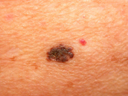

In [8]:
im = Image.open(dest)
im.to_thumb(128,128)

In [ ]:
!rm -rf melanomas

In [9]:
#export
melanomas_types = 'Superficial spreading melanoma','Nodular melanoma','Lentigo maligna melanoma', 'Acral lentiginous melanoma','Desmoplastic melanoma'
path = Path('melanomas')

In [ ]:
if not path.exists():
    path.mkdir()
    for o in melanomas_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg( f'{o} melanoma')
        download_images(dest, urls=results)

Our folder has image files, as we'd expect:

In [ ]:
fns = get_image_files(path)
fns

(#849) [Path('melanomas/Superficial spreading melanoma/d581881a-f53e-49e0-8a8e-13ad68c10495.jpg'),Path('melanomas/Superficial spreading melanoma/572bb515-f872-4ff7-af55-4b383d0b1f2c.jpg'),Path('melanomas/Superficial spreading melanoma/4ff8b95b-8135-452f-aa25-287b5f75c390.jpg'),Path('melanomas/Superficial spreading melanoma/98c593e0-0f19-4d6e-b78d-46e98e229e0b.png'),Path('melanomas/Superficial spreading melanoma/a9efe743-b93a-4b06-86f7-f3b0f0ce23b0.png'),Path('melanomas/Superficial spreading melanoma/fd2cd514-55eb-460e-9cc1-154f28f7cca5.jpg'),Path('melanomas/Superficial spreading melanoma/6e128bcb-ee37-4b71-828a-dc65a3094b0f.jpg'),Path('melanomas/Superficial spreading melanoma/19e4373c-ea65-4c24-8ee8-ad23b9074f8c.jpg'),Path('melanomas/Superficial spreading melanoma/af8867e1-0c49-44a8-b377-6d4484f9c825.jpg'),Path('melanomas/Superficial spreading melanoma/738dcc5a-6506-4a3e-85d6-9e6d5b85d49e.jpg')...]

> j: I just love this about working in Jupyter notebooks! It's so easy to gradually build what I want, and check my work every step of the way. I make a _lot_ of mistakes, so this is really helpful to me...

Often when we download files from the internet, there are a few that are corrupt. Let's check:

In [ ]:
failed = verify_images(fns)
failed

(#14) [Path('melanomas/Superficial spreading melanoma/b16a0867-2434-49bc-aaa7-6a209b57416e.jpg'),Path('melanomas/Lentigo maligna melanoma/60f2641d-1313-42f6-b032-fec1503199d0.jpg'),Path('melanomas/Desmoplastic melanoma/f001aae5-1c79-4e52-b79c-17f54573b552.jpg'),Path('melanomas/Desmoplastic melanoma/16b9b7ea-6bb0-4ca9-b4ab-110c107b2933.jpg'),Path('melanomas/Desmoplastic melanoma/65a07c57-59ca-4520-bd5e-75a5893fa130.jpg'),Path('melanomas/Desmoplastic melanoma/b681a925-1317-4638-8772-62efa0abb4de.jpg'),Path('melanomas/Nodular melanoma/b1ab1edd-6074-4da1-a188-b7a631821c0e.jpg'),Path('melanomas/Nodular melanoma/137641ae-8c31-42da-ac52-d05d9fdc8655.jpg'),Path('melanomas/Nodular melanoma/cb4ba47d-173e-4633-9e9c-c1f7317820d5.jpg'),Path('melanomas/Nodular melanoma/c14323bc-6abb-4648-b09f-fe6e94e2f7f4.jpg')...]

To remove all the failed images, you can use `unlink` on each of them. Note that, like most fastai functions that return a collection, `verify_images` returns an object of type `L`, which includes the `map` method. This calls the passed function on each element of the collection:

In [ ]:
failed.map(Path.unlink);

### Sidebar: Getting Help in Jupyter Notebooks

In [ ]:
??verify_images

Jupyter notebooks are great for experimenting and immediately seeing the results of each function, but there is also a lot of functionality to help you figure out how to use different functions, or even directly look at their source code. For instance, if you type in a cell:
```
??verify_images
```
a window will pop up with:
```
Signature: verify_images(fns)
Source:   
def verify_images(fns):
    "Find images in `fns` that can't be opened"
    return L(fns[i] for i,o in
             enumerate(parallel(verify_image, fns)) if not o)
File:      ~/git/fastai/fastai/vision/utils.py
Type:      function
```
This tells us what argument the function accepts (`fns`), then shows us the source code and the file it comes from. Looking at that source code, we can see it applies the function `verify_image` in parallel and only keeps the image files for which the result of that function is `False`, which is consistent with the doc string: it finds the images in `fns` that can't be opened.

Here are some other features that are very useful in Jupyter notebooks:

- At any point, if you don't remember the exact spelling of a function or argument name, you can press Tab to get autocompletion suggestions.
- When inside the parentheses of a function, pressing Shift and Tab simultaneously will display a window with the signature of the function and a short description. Pressing these keys twice will expand the documentation, and pressing them three times will open a full window with the same information at the bottom of your screen.
- In a cell, typing `?func_name` and executing will open a window with the signature of the function and a short description.
- In a cell, typing `??func_name` and executing will open a window with the signature of the function, a short description, and the source code.
- If you are using the fastai library, we added a `doc` function for you: executing `doc(func_name)` in a cell will open a window with the signature of the function, a short description and links to the source code on GitHub and the full documentation of the function in the [library docs](https://docs.fast.ai).
- Unrelated to the documentation but still very useful: to get help at any point if you get an error, type `%debug` in the next cell and execute to open the [Python debugger](https://docs.python.org/3/library/pdb.html), which will let you inspect the content of every variable.

### End sidebar

`DataLoaders` is a thin class that just stores whatever `DataLoader` objects you pass to it, and makes them available as `train` and `valid`. Although it's a very simple class, it's very important in fastai: it provides the data for your model. The key functionality in `DataLoaders` is provided with just these four lines of code (it has some other minor functionality we'll skip over for now):

```python
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])
```

In [ ]:
melanomas = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = melanomas.dataloaders(path)

### Data Augmentation

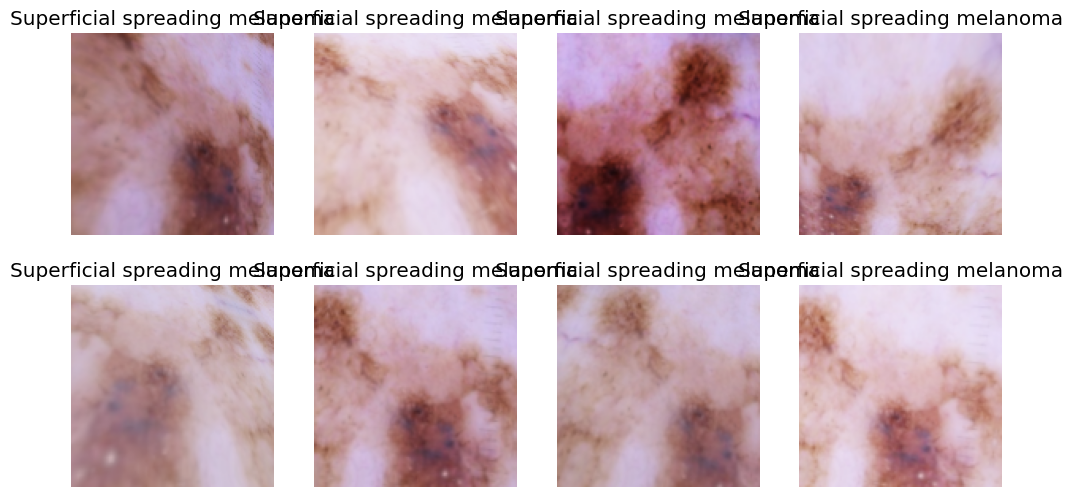

In [ ]:
melanomas = melanomas.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = melanomas.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
melanomas = melanomas.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = melanomas.dataloaders(path)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

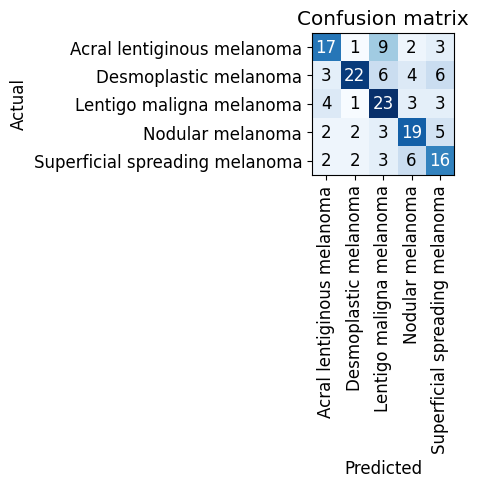

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
plot_top_losses??

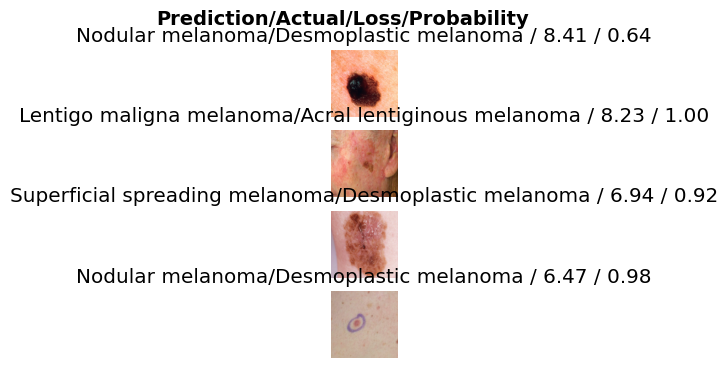

In [ ]:
interp.plot_top_losses(4, nrows=4, figsize=(17,4))

In [ ]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
#hide
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
learn.export('model.pkl')

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('model.pkl')]

In [ ]:
learn_inf = load_learner(path/'model.pkl')

When we're doing inference, we're generally just getting predictions for one image at a time. To do this, pass a filename to `predict`:

In [ ]:
learn_inf.predict('images/malignant melanoma.jpg')

('Superficial spreading melanoma',
 tensor(4),
 tensor([0.0207, 0.1234, 0.0693, 0.0926, 0.6941]))

In [ ]:
learn_inf.dls.vocab

['Acral lentiginous melanoma', 'Desmoplastic melanoma', 'Lentigo maligna melanoma', 'Nodular melanoma', 'Superficial spreading melanoma']

In [ ]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

<img alt="An upload button" width="159" src="https://github.com/fastai/fastbook/blob/master/images/att_00008.png?raw=1">

Now we can grab the image:

In [ ]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['images/malignant melanoma.jpg'])

In [ ]:
img = PILImage.create(btn_upload.data[-1])

We can use an `Output` widget to display it:

In [ ]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

and use a `Label` to display them:

In [ ]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 1.0000')

`Prediction: grizzly; Probability: 1.0000`

We'll need a button to do the classification. It looks exactly like the upload button:

In [ ]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

We'll also need a *click event handler*; that is, a function that will be called when it's pressed. We can just copy over the lines of code from above:

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

You can test the button now by pressing it, and you should see the image and predictions update automatically!

We can now put them all in a vertical box (`VBox`) to complete our GUI:

In [ ]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [ ]:
#hide_output
VBox([widgets.Label('Select your bear!'),
      btn_upload, btn_run, out_pl, lbl_pred])

We have written all the code necessary for our app. The next step is to convert it into something we can deploy.

### Turning Your Notebook into a Real App

In [ ]:
#hide
# !pip install voila
# !jupyter serverextension enable --sys-prefix voila

### Deploying your app

## How to Avoid Disaster

### Unforeseen Consequences and Feedback Loops

## Get Writing!

## Questionnaire

1. Provide an example of where the bear classification model might work poorly in production, due to structural or style differences in the training data.
1. Where do text models currently have a major deficiency?
1. What are possible negative societal implications of text generation models?
1. In situations where a model might make mistakes, and those mistakes could be harmful, what is a good alternative to automating a process?
1. What kind of tabular data is deep learning particularly good at?
1. What's a key downside of directly using a deep learning model for recommendation systems?
1. What are the steps of the Drivetrain Approach?
1. How do the steps of the Drivetrain Approach map to a recommendation system?
1. Create an image recognition model using data you curate, and deploy it on the web.
1. What is `DataLoaders`?
1. What four things do we need to tell fastai to create `DataLoaders`?
1. What does the `splitter` parameter to `DataBlock` do?
1. How do we ensure a random split always gives the same validation set?
1. What letters are often used to signify the independent and dependent variables?
1. What's the difference between the crop, pad, and squish resize approaches? When might you choose one over the others?
1. What is data augmentation? Why is it needed?
1. What is the difference between `item_tfms` and `batch_tfms`?
1. What is a confusion matrix?
1. What does `export` save?
1. What is it called when we use a model for getting predictions, instead of training?
1. What are IPython widgets?
1. When might you want to use CPU for deployment? When might GPU be better?
1. What are the downsides of deploying your app to a server, instead of to a client (or edge) device such as a phone or PC?
1. What are three examples of problems that could occur when rolling out a bear warning system in practice?
1. What is "out-of-domain data"?
1. What is "domain shift"?
1. What are the three steps in the deployment process?

### Further Research

1. Consider how the Drivetrain Approach maps to a project or problem you're interested in.
1. When might it be best to avoid certain types of data augmentation?
1. For a project you're interested in applying deep learning to, consider the thought experiment "What would happen if it went really, really well?"
1. Start a blog, and write your first blog post. For instance, write about what you think deep learning might be useful for in a domain you're interested in.